<BarContainer object of 4 artists>

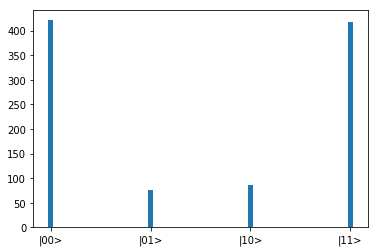

In [15]:
import sqc
import matplotlib.pyplot as plt

Nbits=2

sqc.seed(13)

# Create noise model
nm=sqc.noise.model.simple(
    T1 = 50,
    gate_times = { "H" : 0.5, "CNOT" : 1.0, "Rz" : 0.0, "X": 0.5 },
    qubit_readout_errors = [ 0.05, 0.05 ],
    gate_depolarization_p = { "X" : 0.05, "CNOT" : 0.1, "Rz" : 0.0, "H" : 0.1 }
)

# Create Bell state
op=sqc.operator(Nbits).H(0).CNOT(0,1)

# Initial state
s0=sqc.state(Nbits)

# Sample
res=sqc.noise.sample(nm,op,s0,1000)
x=sorted(res.keys())
y=[ res[i] for i in x ]

plt.bar([ s0.basis[i] for i in x ],y,width=0.05)